<a href="https://colab.research.google.com/github/pnkjkpvt/CarDekho-car-price-prediction/blob/main/CarDekho_car_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get Kaggle datasets

In [ ]:
! pip install -q kaggle

from google.colab import files

#TODO : Upload kaggle.json file (Kaggle API token)
files.upload() 

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets list

Get the dataset files

In [ ]:
!kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho

In [ ]:
!unzip vehicle-dataset-from-cardekho.zip

Reading the data

In [174]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [175]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [176]:
for col in df.columns:
  print (col, ":")
  print(df[col].unique())

Car_Name :
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' '

Look up for Nan values

In [177]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [178]:
#TODO establish that there is no significant coorelation between car name alone and it's price before removing this feature
df['Car_Name'].value_counts()  # Find that few cars appear more often in the dataset

city                   26
corolla altis          16
verna                  14
fortuner               11
brio                   10
                       ..
KTM RC390               1
Bajaj  ct 100           1
Bajaj Avenger 150       1
Bajaj Pulsar 135 LS     1
Hero Glamour            1
Name: Car_Name, Length: 98, dtype: int64

Preprocessing the Data

In [179]:
#Removing the car name feature
data = df.iloc[:,1:]
# Finding the age of the car. Derived attribute
data['Age'] = 2020-data['Year']
#Removing the 'Year' attribute
data = data.iloc[:,1:]
print(data.shape)
data.head()

(301, 8)


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


Encoding categorical data

Below encoding can lead to a scenario called [dummy variable trap](https://www.geeksforgeeks.org/ml-dummy-variable-trap-in-regression-models/) if we use some regression model

We can use a function in pandas to generate one hot encoding easily and avoid the trap by setting the parameters properly

In [180]:
# from sklearn.preprocessing import LabelEncoder

# # Label encoding
# labelencoder = LabelEncoder()
# data['Fuel_Type'] = labelencoder.fit_transform(data['Fuel_Type'])
# data['Seller_Type'] = labelencoder.fit_transform(data['Seller_Type'])
# data['Transmission'] = labelencoder.fit_transform(data['Transmission'])

# # Create one hot encoding
# onehotencoder = OneHotEncoder(handle_unknown='ignore')

# fuel_type = pd.DataFrame(onehotencoder.fit_transform(data[['Fuel_Type']]).toarray())
# #Delete the "Fuel Type" column now
# data.drop(['Fuel_Type'],axis = 1, inplace=True)
# data.head()

In [181]:
data = pd.get_dummies(data, drop_first=True) 

data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


Playing a little bit with plots

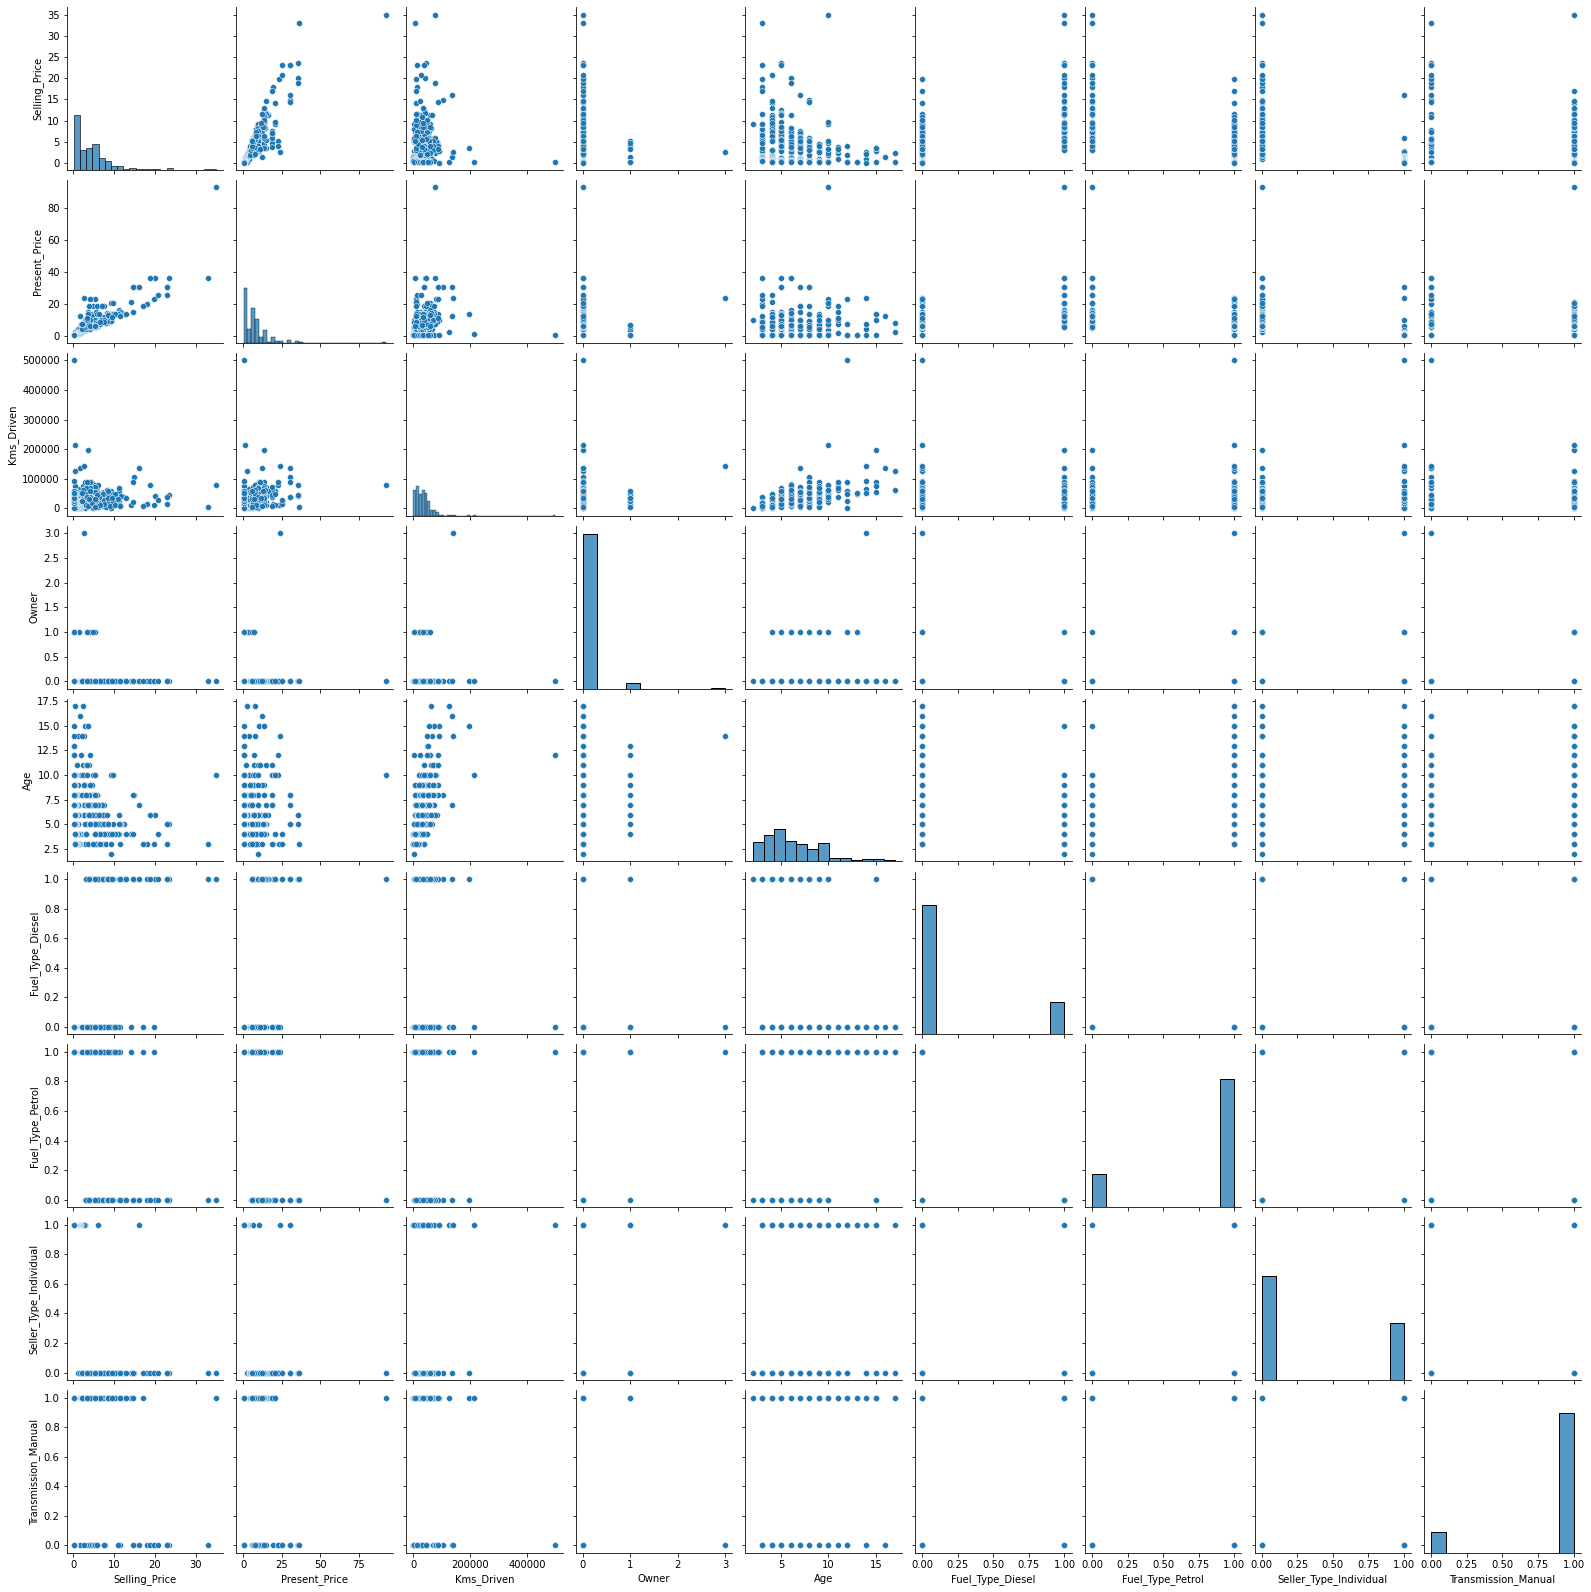

In [182]:
import seaborn as sb
sb.pairplot(data)

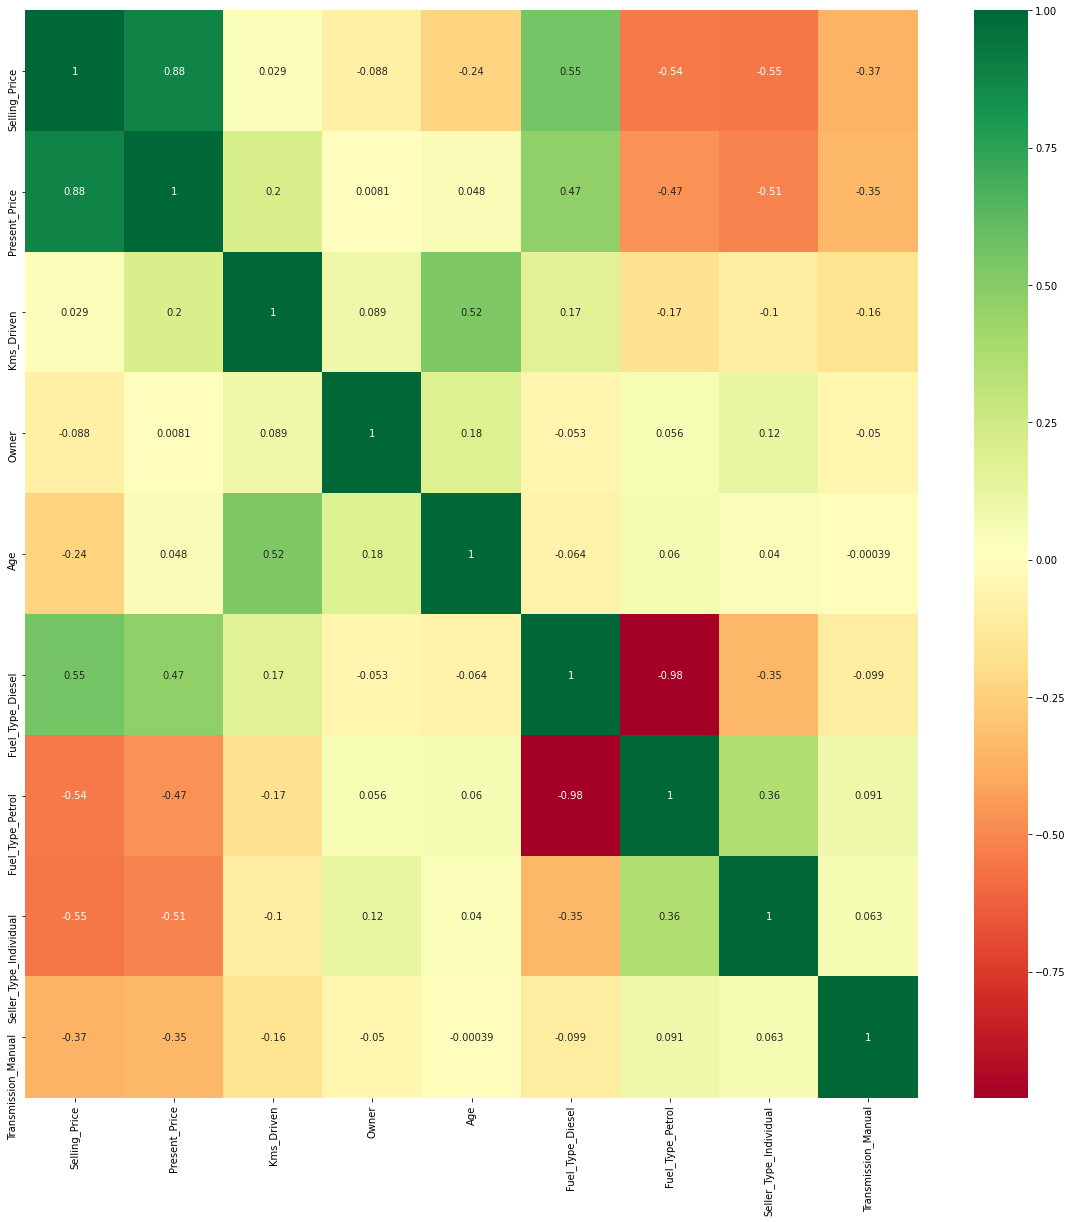

In [183]:
import matplotlib.pyplot as plt
%matplotlib inline

corrmat=data.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) 
#plot heat map 
g=sb.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Separate example and labels (X and Y)

In [196]:

X = data.iloc[:,1:]
Y = data.iloc[:,0]
X.head()

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


Break the dataset in train and test data sets

In [197]:
from sklearn.model_selection import train_test_split

xtrain, ytrain, xtest, ytest = train_test_split(X, Y, test_size=0.2)



---

Trying Random Forest Regressoion
---
Usually Random Forests perform nice with lower dimension data.

No need for data normalization here as we're not going to learn parameters using algorithms like gradient descent



In [198]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()

Normalizing data

In [192]:
ytrain.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64